## Homework 1 - Group G (Zhao,Chenyu / Mao,Shenyi / Ferreira,Jose / Jiang,Yueting)

In [1]:
import pandas as pd
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

We use the Levenberg-Marquardt method to find the best fit $g(x, T)$ by minimizing its corresponding cost function:

In [2]:
# Load the observation data
df=pd.read_csv("Assignment1_data.csv",header=None)
T=np.array(df[0])
S=np.array(df[1])

In [3]:
# Define the model and the function to be minimized
def model(x, t):
    return x[0] + x[1] * np.exp(x[2] * t) + x[3] * np.exp(x[4]*t)

def fun(x, t, y):
    return model(x,t) - y

An important step for the algorithm is to choose an appropriate initial guess since different initial points will find different local minimums. Ideally we would try to find an analytical solution to this problem by checking the gradient and determining critical points. However, this is not always possible or easy to do. An approach that could help in this situation is to run the least squares fit many times with different initial guesses and choose the results with the minimum cost among the different runs.

In [4]:
# Generate a random vector with uniform distribution between min_range and max_range
def draw_uniform_random_vector(n, min_range, max_range):
    result = []
    for i in range(n):
        result.append(np.random.uniform(min_range,max_range))
    return result


# Determine the number of runs we will attempt.
trials = 1000
# Choose a range of values near the origin as our observation points are also close to the origin.
min_range = -10
max_range = 10
min_cost = float('inf')
min_x = []
min_initial = []

for i in range(trials):
    # generate a random initial guess within the established range
    x0=draw_uniform_random_vector(5,min_range, max_range)
    # run the least squares minimization
    res_lsq = least_squares(fun, x0, args=(T,S),method='lm')
    # store the run that results in the minimum cost
    if res_lsq.success and res_lsq.cost < min_cost:
        min_initial = x0
        min_cost = res_lsq.cost
        min_x = res_lsq.x

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Print the results
np.set_printoptions(precision=6, suppress=True)
print("Best solution found:\n")
print("Initial guess vector")
print(np.asfarray(min_initial,float))
print("Solution points")
print(np.asfarray(min_x,float))
print("Value of the cost function at the solution points")
print(np.float(min_cost))

Best solution found:

Initial guess vector
[-9.138055  2.936384 -0.926729  4.012429 -6.308785]
Solution points
[-90.493157  93.155859  -0.001735  -2.002529  -0.327355]
Value of the cost function at the solution points
0.0018949704698541844


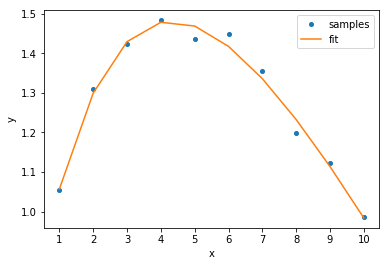

In [6]:
# Plot the regression line and the sample data together for visual comparison  
test_y = model(min_x,T)
plt.plot(T, S, 'o', markersize=4, label='samples')
plt.plot(T, test_y, label='fit')
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

We will still find multiple solutions to this optimization problem. If the number of observations can be increased or if the number of trials is large enough and the approach to selecting our candidates is refined further, there will be good chances of finding a good solution. For example, the following vectors were found to be initial guesses that result in a good approximation to the empirical data:

Solution(v1)=[-39.575525  -2.029013  -0.324585  42.26545   -0.003924]
Cost(v1)=0.0018949764351424178
Solution(v2)=[-37.888775  40.580864  -0.004095  -2.031119  -0.324369]
Cost(v2)=0.001894978244618295
Solution(v3)[-90.638328  93.301003  -0.001732  -2.002502  -0.327357]
Cost(v3)=0.0018949704826973287


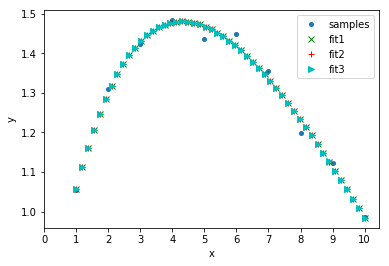

In [7]:
v1 = [-3.225592, 4.425831, -3.60924, 1.335173, -0.965292]
res_lsq1 = least_squares(fun, v1, args=(T, S),method='lm')
print("Solution(v1)=" + str(res_lsq1.x))
print("Cost(v1)=" + str(res_lsq1.cost))

v2 = [-4.854418,  0.202496, -0.511985, 1.951083, -9.80848]
res_lsq2 = least_squares(fun, v2, args=(T, S),method='lm')
print("Solution(v2)=" + str(res_lsq2.x))
print("Cost(v2)=" + str(res_lsq2.cost))

v3 = [-4.275311, 0.312809, -0.267237, 4.902038, -3.630587]
res_lsq3 = least_squares(fun, v3, args=(T, S),method='lm')
print("Solution(v3)" + str(res_lsq3.x))
print("Cost(v3)=" + str(res_lsq3.cost))

# Plot the fits of the above points 
test_x = np.linspace(1,10)
plt.plot(T, S, 'o', markersize=4, label='samples')
plt.plot(test_x, model(res_lsq1.x,test_x), 'gx',label='fit1')
plt.plot(test_x, model(res_lsq2.x,test_x), 'r+',label='fit2')
plt.plot(test_x, model(res_lsq3.x,test_x), 'c>',label='fit3')
plt.xticks(np.arange(0, 11, 1.0))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Problem 2

In [8]:
# Define a discrete linear space to evaluate the Rosenbrock function 
x0=[]
for x in np.arange(0.0, 2.0, 0.1):
    for  y in np.arange(0.0, 2.0, 0.1):
        x0.append(np.array([x,y]))

In [9]:
# Define the function and its gradient
def Rosenbrock(x,y):
    return (x-1)**2+100*(y-x*x)**2
def Gradient(x,y):
    return np.array([2*(x-1)-2*x*200*(y-x*x),200*(y-x*x)])

In [10]:
# Implements gradient descent
def GradientDescent(initial,alpha=0.001,max_it=10000,tol=1e-8):
    for i in range(max_it):
        last=initial.copy()
        g=Gradient(initial[0],initial[1])
        initial[0]-=alpha*g[0]
        initial[1]-=alpha*g[1]
        if np.linalg.norm(initial-last) < tol:
            return [True,initial[0],initial[1],i]
    return [False,None,None,None]
        

In [11]:
# Run gradient descent from every point in the space defined, print out the solutions from 
# convergent runs to the screen
for item in x0:
    temp=item.copy()
    res=GradientDescent(item)
    if res[0]:
        print(temp,res[1],res[2],res[3])

[1. 1.] 1.0 1.0 0


Only the initial guess at (1.,1.) makes this method converge

### Problem 3

In [15]:
from scipy.optimize import rosen, differential_evolution

# Define the ackley function
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Define the lower and upper bounds for the optimization process
bounds = [(0, 2), (0, 2)]
bounds2 = [(0, 5), (0, 5)]

#### Rosenbrock

In [16]:
# We experimented with the method of creating initial guesses. The Latin Hypercube sampling 
# tries to maximize coverage of the parameter space. 
# The other method (random) generates the initial population randomly. 
for ini in ['latinhypercube','random']:
    for pop in range(2,21,2):
        result = differential_evolution(rosen, bounds,popsize=pop,init=ini)
        print(ini,pop,": ",result.success,", number of iteration: ",result.nit)

latinhypercube 2 :  True , number of iteration:  5
latinhypercube 4 :  True , number of iteration:  34
latinhypercube 6 :  True , number of iteration:  20
latinhypercube 8 :  True , number of iteration:  120
latinhypercube 10 :  True , number of iteration:  110
latinhypercube 12 :  True , number of iteration:  123
latinhypercube 14 :  True , number of iteration:  121
latinhypercube 16 :  True , number of iteration:  128
latinhypercube 18 :  True , number of iteration:  131
latinhypercube 20 :  True , number of iteration:  121
random 2 :  True , number of iteration:  13
random 4 :  True , number of iteration:  9
random 6 :  True , number of iteration:  122
random 8 :  True , number of iteration:  112
random 10 :  True , number of iteration:  127
random 12 :  True , number of iteration:  130
random 14 :  True , number of iteration:  115
random 16 :  True , number of iteration:  126
random 18 :  True , number of iteration:  121
random 20 :  True , number of iteration:  117


The differential evolution algorithm is able to find solutions to the Rosenbrock function effectively which is something the gradient descent algorithm could not achieve. Interestingly, after a certain population size, the number of iterations necessary remains more or less constant.
In regards to the initialization choices, the latin hypercube method performs residually better.  

#### Ackley

In [17]:
# Perform the differential evolution optimization on the Ackley function.
for ini in ['latinhypercube','random']:
    for pop in range(2,21,2):
        result = differential_evolution(ackley, bounds2,popsize=pop,init=ini)
        print(ini,pop,": ",result.success,", number of iteration: ",result.nit)

latinhypercube 2 :  True , number of iteration:  1
latinhypercube 4 :  True , number of iteration:  52
latinhypercube 6 :  True , number of iteration:  75
latinhypercube 8 :  True , number of iteration:  121
latinhypercube 10 :  True , number of iteration:  68
latinhypercube 12 :  True , number of iteration:  149
latinhypercube 14 :  True , number of iteration:  157
latinhypercube 16 :  True , number of iteration:  149
latinhypercube 18 :  True , number of iteration:  137
latinhypercube 20 :  True , number of iteration:  137
random 2 :  True , number of iteration:  17
random 4 :  True , number of iteration:  14
random 6 :  True , number of iteration:  9
random 8 :  True , number of iteration:  13
random 10 :  True , number of iteration:  85
random 12 :  True , number of iteration:  130
random 14 :  True , number of iteration:  145
random 16 :  True , number of iteration:  128
random 18 :  True , number of iteration:  159
random 20 :  True , number of iteration:  161


The results with the Ackley function are similar to the ones obtained with the Rosenbrock function. After a certain population size, the number of iterations needed remains constant.